# Tugas 04 : **Centrality**

NAMA : Mohammad Iqbal Surya Ramadhan

NIM  : 210411100002

MATA KULIAH : Pencarian dan Penambangan Web - A

Centrality adalah konsep dalam teori graf yang digunakan untuk mengukur pentingnya suatu simpul (node) dalam sebuah jaringan (graph). Dalam jaringan, simpul-simpul saling terhubung oleh tepi (edges), dan centrality membantu menentukan simpul mana yang paling berpengaruh atau paling "sentral" dalam proses komunikasi, aliran informasi, atau interaksi dalam jaringan tersebut. Ada beberapa jenis centrality yang masing-masing menawarkan cara berbeda untuk menentukan simpul yang penting.

beberapa jenis centrality yang paling umum:

1. Degree Centrality (Sentralitas Derajat) :
*   Mengukur seberapa banyak koneksi langsung yang dimiliki oleh suatu simpul.
*   Semakin banyak koneksi langsung, semakin besar degree centrality simpul tersebut.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki banyak teman atau kontak langsung akan memiliki degree centrality yang tinggi.

2. Closeness Centrality (Sentralitas Kedekatan) :
*   Mengukur seberapa dekat suatu simpul dengan simpul lain dalam jaringan.
*   Semakin kecil total jarak antara simpul tersebut dengan semua simpul lainnya, semakin tinggi closeness centrality-nya.
*   Contoh: Dalam sebuah jaringan transportasi, simpul yang bisa mencapai simpul lain dengan cepat memiliki closeness centrality yang tinggi.

3. Betweenness Centrality (Sentralitas Keterhubungan) :
*   Mengukur seberapa sering suatu simpul berada di antara jalur terpendek (shortest path) antara dua simpul lainnya.
*   Simpul dengan betweenness centrality tinggi berperan sebagai "jembatan" atau perantara dalam jaringan, yang memungkinkan aliran informasi melalui mereka.
*   Contoh: Dalam sebuah jaringan bisnis, seseorang yang menjadi perantara komunikasi antara dua kelompok mungkin memiliki betweenness centrality yang tinggi.

5. Eigenvector Centrality (Sentralitas Eigenvector):
*   Tidak hanya menghitung berapa banyak koneksi yang dimiliki oleh suatu simpul, tetapi juga seberapa penting koneksi-koneksi tersebut.
*   Simpul yang terhubung dengan simpul penting lainnya akan memiliki eigenvector centrality yang tinggi.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki koneksi ke orang-orang yang sangat berpengaruh akan memiliki eigenvector centrality yang tinggi.

Centrality digunakan dalam berbagai bidang seperti ilmu sosial, biologi, ekonomi, dan ilmu komputer untuk menganalisis struktur jaringan dan mengidentifikasi simpul kunci yang memiliki pengaruh besar dalam jaringan tersebut.



In [79]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df = pd.read_csv("/content/drive/My Drive/PPWA/report/Tugas-PPWA/Hasil_Prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,"Nunggak 8 Bulan, Segini Pajak Ford Mustang Mil...","Kamis, 19 Sep 2024 13:05 WIB",Jakarta - Bareskrim Polri menyita aset senilai...,Otomotif,Jakarta Bareskrim Polri menyita aset senilai ...,jakarta bareskrim polri menyita aset senilai ...,"['jakarta', 'bareskrim', 'polri', 'menyita', '...",jakarta bareskrim polri menyita aset senilai r...
1,Bos Ford Kaget usai Jajal Mobil China: Mereka ...,"Kamis, 19 Sep 2024 12:33 WIB","Jakarta - Chief Executive Officer (CEO) Ford, ...",Otomotif,Jakarta Chief Executive Officer CEO Ford Jim ...,jakarta chief executive officer ceo ford jim ...,"['jakarta', 'chief', 'executive', 'officer', '...",jakarta chief executive officer ceo ford jim f...
2,"Tarif Tol Dalam Kota Naik Jadi Segini, Berlaku...","Kamis, 19 Sep 2024 12:08 WIB",Jakarta - Jasa Marga mengumumkan kenaikan tari...,Otomotif,Jakarta Jasa Marga mengumumkan kenaikan tarif...,jakarta jasa marga mengumumkan kenaikan tarif...,"['jakarta', 'jasa', 'marga', 'mengumumkan', 'k...",jakarta jasa marga mengumumkan kenaikan tarif ...
3,Pak RT Aleix Espargaro Tak Sabar Balapan Terak...,"Kamis, 19 Sep 2024 11:40 WIB","Jakarta - Pebalap Aprilia asal Spanyol, Aleix ...",Otomotif,Jakarta Pebalap Aprilia asal Spanyol Aleix Es...,jakarta pebalap aprilia asal spanyol aleix es...,"['jakarta', 'pebalap', 'aprilia', 'asal', 'spa...",jakarta pebalap aprilia spanyol aleix espargar...
4,Angkot Listrik Bakal Diuji Coba di Jakarta,"Kamis, 19 Sep 2024 11:18 WIB",Jakarta - PT Transportasi Jakarta (TransJakart...,Otomotif,Jakarta PT Transportasi Jakarta TransJakarta ...,jakarta pt transportasi jakarta transjakarta ...,"['jakarta', 'pt', 'transportasi', 'jakarta', '...",jakarta pt transportasi jakarta transjakarta k...


In [81]:
import ast
import pandas as pd

# Salin dataframe
df_doc = df.copy()

# Fungsi untuk menangani literal_eval dengan aman
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x  # Kembalikan nilai asli jika tidak bisa di-evaluasi

# Mengonversi string menjadi list jika perlu
df_doc['stopword_removal'] = df_doc['stopword_removal'].apply(safe_literal_eval)

# Membuat kolom baru 'clean_text' dengan menggabungkan list dalam 'stopword_removal' menjadi kalimat biasa
df_doc['clean_text'] = df_doc['stopword_removal'].apply(lambda x: ' '.join([str(word) for word in x]) if isinstance(x, list) else str(x))

df_doc


,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal,clean_text
0,"Nunggak 8 Bulan, Segini Pajak Ford Mustang Mil...","Kamis, 19 Sep 2024 13:05 WIB",Jakarta - Bareskrim Polri menyita aset senilai...,Otomotif,Jakarta Bareskrim Polri menyita aset senilai ...,jakarta bareskrim polri menyita aset senilai ...,"['jakarta', 'bareskrim', 'polri', 'menyita', '...",jakarta bareskrim polri menyita aset senilai r...,jakarta bareskrim polri menyita aset senilai r...
1,Bos Ford Kaget usai Jajal Mobil China: Mereka ...,"Kamis, 19 Sep 2024 12:33 WIB","Jakarta - Chief Executive Officer (CEO) Ford, ...",Otomotif,Jakarta Chief Executive Officer CEO Ford Jim ...,jakarta chief executive officer ceo ford jim ...,"['jakarta', 'chief', 'executive', 'officer', '...",jakarta chief executive officer ceo ford jim f...,jakarta chief executive officer ceo ford jim f...
2,"Tarif Tol Dalam Kota Naik Jadi Segini, Berlaku...","Kamis, 19 Sep 2024 12:08 WIB",Jakarta - Jasa Marga mengumumkan kenaikan tari...,Otomotif,Jakarta Jasa Marga mengumumkan kenaikan tarif...,jakarta jasa marga mengumumkan kenaikan tarif...,"['jakarta', 'jasa', 'marga', 'mengumumkan', 'k...",jakarta jasa marga mengumumkan kenaikan tarif ...,jakarta jasa marga mengumumkan kenaikan tarif ...
3,Pak RT Aleix Espargaro Tak Sabar Balapan Terak...,"Kamis, 19 Sep 2024 11:40 WIB","Jakarta - Pebalap Aprilia asal Spanyol, Aleix ...",Otomotif,Jakarta Pebalap Aprilia asal Spanyol Aleix Es...,jakarta pebalap aprilia asal spanyol aleix es...,"['jakarta', 'pebalap', 'aprilia', 'asal', 'spa...",jakarta pebalap aprilia spanyol aleix espargar...,jakarta pebalap aprilia spanyol aleix espargar...
4,Angkot Listrik Bakal Diuji Coba di Jakarta,"Kamis, 19 Sep 2024 11:18 WIB",Jakarta - PT Transportasi Jakarta (TransJakart...,Otomotif,Jakarta PT Transportasi Jakarta TransJakarta ...,jakarta pt transportasi jakarta transjakarta ...,"['jakarta', 'pt', 'transportasi', 'jakarta', '...",jakarta pt transportasi jakarta transjakarta k...,jakarta pt transportasi jakarta transjakarta k...
...,...,...,...,...,...,...,...,...,...
95,Suku Bunga BI Dipangkas Jadi 6% Dinilai Berani,"Rabu, 18 Sep 2024 21:15 WIB",Jakarta - Bank Indonesia (BI) memutuskan untuk...,Keuangan,Jakarta Bank Indonesia BI memutuskan untuk me...,jakarta bank indonesia bi memutuskan untuk me...,"['jakarta', 'bank', 'indonesia', 'bi', 'memutu...",jakarta bank indonesia bi memutuskan menurunka...,jakarta bank indonesia bi memutuskan menurunka...
96,Prabowo Ingatkan Perang Makin Marak hingga Sal...,"Rabu, 18 Sep 2024 21:00 WIB",Jakarta - Presiden terpilih Prabowo Subianto m...,Keuangan,Jakarta Presiden terpilih Prabowo Subianto me...,jakarta presiden terpilih prabowo subianto me...,"['jakarta', 'presiden', 'terpilih', 'prabowo',...",jakarta presiden terpilih prabowo subianto men...,jakarta presiden terpilih prabowo subianto men...
97,"Ditjen Pajak Respons Kabar 6 Juta NPWP Bocor, ...","Rabu, 18 Sep 2024 20:36 WIB",Jakarta - Direktorat Jenderal Pajak (DJP) Keme...,Keuangan,Jakarta Direktorat Jenderal Pajak DJP Kemente...,jakarta direktorat jenderal pajak djp kemente...,"['jakarta', 'direktorat', 'jenderal', 'pajak',...",jakarta direktorat jenderal pajak djp kementer...,jakarta direktorat jenderal pajak djp kementer...
98,Buruh Waswas Kisruh di Kadin Pengaruhi Penetap...,"Rabu, 18 Sep 2024 20:30 WIB",Jakarta - Presiden Partai Buruh yang juga Pres...,Keuangan,Jakarta Presiden Partai Buruh yang juga Presi...,jakarta presiden partai buruh yang juga presi...,"['jakarta', 'presiden', 'partai', 'buruh', 'ya...",jakarta presiden partai buruh presiden konfede...,jakarta presiden partai buruh presiden konfede...


In [82]:
# Cek jumlah missing values di setiap kolom
missing_values = df_doc.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
judul               0
tanggal             0
isi                 0
kategori            0
cleansing           0
case_folding        0
tokenize            0
stopword_removal    0
clean_text          0
dtype: int64


In [83]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df_doc.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df_doc['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df_doc)



Nilai sebelum dan sesudah konversi:
{'Keuangan': 0, 'Otomotif': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Nunggak 8 Bulan, Segini Pajak Ford Mustang Mil...   
1   Bos Ford Kaget usai Jajal Mobil China: Mereka ...   
2   Tarif Tol Dalam Kota Naik Jadi Segini, Berlaku...   
3   Pak RT Aleix Espargaro Tak Sabar Balapan Terak...   
4          Angkot Listrik Bakal Diuji Coba di Jakarta   
..                                                ...   
95     Suku Bunga BI Dipangkas Jadi 6% Dinilai Berani   
96  Prabowo Ingatkan Perang Makin Marak hingga Sal...   
97  Ditjen Pajak Respons Kabar 6 Juta NPWP Bocor, ...   
98  Buruh Waswas Kisruh di Kadin Pengaruhi Penetap...   
99  PIS Beberkan Rencana Tekan Emisi Karbon di Mas...   

                         tanggal  \
0   Kamis, 19 Sep 2024 13:05 WIB   
1   Kamis, 19 Sep 2024 12:33 WIB   
2   Kamis, 19 Sep 2024 12:08 WIB   
3   Kamis, 19 Sep 2024 11:40 WIB   
4   Kamis, 19 Sep 2024 11:18 WIB

In [84]:
# Menyimpan DataFrame ke file CSV
df_doc.to_csv('FILETUGAS4.csv', index=False)

# **Split Data**

In [85]:
from sklearn.model_selection import train_test_split

# Split data
x = df_doc['clean_text']
y = df_doc['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta bareskrim polri menyita aset senilai r...
1     jakarta chief executive officer ceo ford jim f...
2     jakarta jasa marga mengumumkan kenaikan tarif ...
3     jakarta pebalap aprilia spanyol aleix espargar...
4     jakarta pt transportasi jakarta transjakarta k...
                            ...                        
95    jakarta bank indonesia bi memutuskan menurunka...
96    jakarta presiden terpilih prabowo subianto men...
97    jakarta direktorat jenderal pajak djp kementer...
98    jakarta presiden partai buruh presiden konfede...
99    jakarta bisnis berkelanjutan emisi karbon rend...
Name: clean_text, Length: 100, dtype: object
0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


# **TF-IDF Weighting**

In [86]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,abdullah,abs,absen,ac,acara,acaraacara,accord,acdkil,acdrrd,aceh,...,zainul,zaman,zeekr,zero,ziko,zimbabwe,zona,zs,zulkifli,zz
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.046091,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [87]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,abdullah,abs,absen,ac,acara,acaraacara,accord,acdkil,acdrrd,aceh,...,zainul,zaman,zeekr,zero,ziko,zimbabwe,zona,zs,zulkifli,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

         Node  Degree Centrality
522       bmw           0.000218
1941   kering           0.000218
2346      max           0.000218
4156    tarif           0.000218
1190     emas           0.000218
...       ...                ...
1541    ilham           0.000000
1542   ilydas           0.000000
1543  imanuel           0.000000
1544   imatap           0.000000
4593       zz           0.000000

[4594 rows x 2 columns]


In [89]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    bmw  kering  max  tarif  emas  spacy  gram  gran  tol  touring
0     0       0    0      0     0      0     0     0    0        0
1     0       0    0      0     0      0     0     0    0        0
2     0       0    0      0     0      0     0     0    0        0
3     0       0    0      0     0      0     0     0    0        0
4     0       1    0      0     0      0     0     0    0        0
..  ...     ...  ...    ...   ...    ...   ...   ...  ...      ...
75    0       0    0      0     0      0     0     0    0        0
76    0       0    0      1     0      0     0     0    1        0
77    0       0    0      0     0      0     0     0    0        0
78    0       0    0      0     0      0     0     0    0        0
79    0       0    0      0     0      0     0     0    0        0

[80 rows x 10 columns]


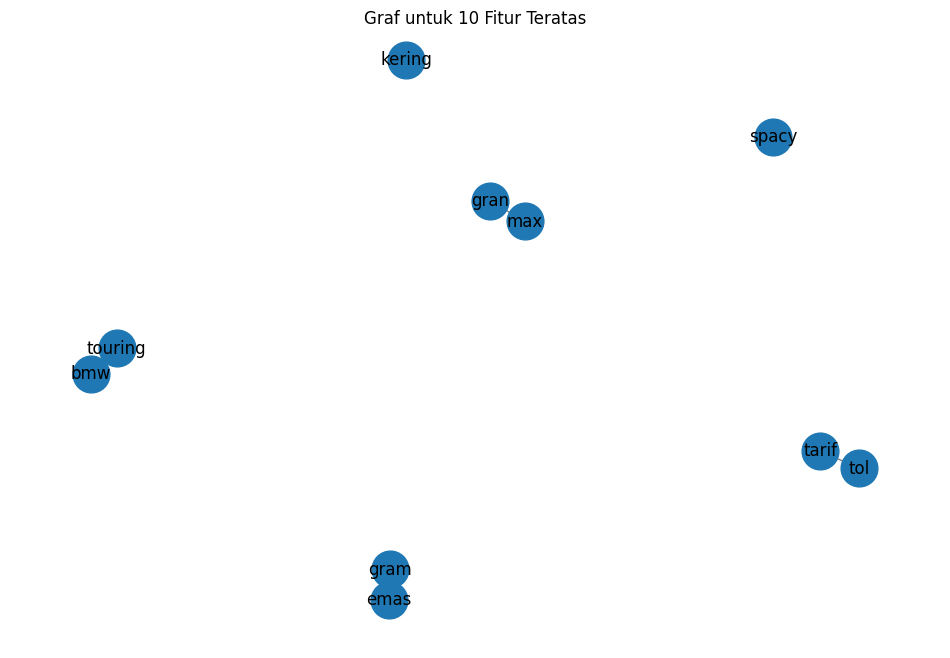

In [90]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [91]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

      Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0      bmw           0.000218              0.111111                     0.0
1   kering           0.000218              0.000000                     0.0
2      max           0.000218              0.111111                     0.0
3    tarif           0.000218              0.111111                     0.0
4     emas           0.000218              0.111111                     0.0
5    spacy           0.000218              0.000000                     0.0
6     gram           0.000218              0.111111                     0.0
7     gran           0.000218              0.111111                     0.0
8      tol           0.000218              0.111111                     0.0
9  touring           0.000218              0.111111                     0.0


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
              bmw  kering  max    tarif  emas  spacy  gram  gran      tol  \
bmw      1.000000     0.0  0.0  0.00000   0.0    0.0   0.0   0.0  0.00000   
kering   0.000000     1.0  0.0  0.00000   0.0    0.0   0.0   0.0  0.00000   
max      0.000000     0.0  1.0  0.00000   0.0    0.0   0.0   1.0  0.00000   
tarif    0.000000     0.0  0.0  1.00000   0.0    0.0   0.0   0.0  0.57735   
emas     0.000000     0.0  0.0  0.00000   1.0    0.0   1.0   0.0  0.00000   
spacy    0.000000     0.0  0.0  0.00000   0.0    1.0   0.0   0.0  0.00000   
gram     0.000000     0.0  0.0  0.00000   1.0    0.0   1.0   0.0  0.00000   
gran     0.000000     0.0  1.0  0.00000   0.0    0.0   0.0   1.0  0.00000   
tol      0.000000     0.0  0.0  0.57735   0.0    0.0   0.0   0.0  1.00000   
touring  0.707107     0.0  0.0  0.00000   0.0    0.0   0.0   0.0  0.00000   

          touring  
bmw      0.707107  
kering   0.000000  
max      0.000000  
tarif    0.000000  
emas     0.0

# Ke 2 : Ambil 1 Berita

Berita Detik Otomotif : https://oto.detik.com/modifikasi-motor/d-7578098/honda-ct125-mahal-mending-modifikasi-supra-jadi-begini

Isi Berita Otomotif : Jakarta - Motor bebek touring Honda CT125 dibanderol sangat mahal, mencapai Rp 81.850.000 on the road Jakarta. Bagi Anda yang memiliki budget terbatas, namun menginginkan motor bebek ikonik seperti CT125, Anda bisa memodifikasi Supra X 125 menjadi bergaya ala CT125. Salah satu bengkel modifikasi yang bisa mengubah Supra X 125 menjadi CT125 adalah bengkel Insan Motor Bekasi. Bermodal kocek di angka Rp 18 juta hingga Rp 20 juta, pemilik Supra X 125 bisa mengubah motornya jadi 'semahal' CT125.
"Biaya modifikasi Rp 18-20 jutaan. Kalau belum punya motornya, bisa beli bahannya harga Rp 5 jutaan, yang penting surat-suratnya lengkap," ungkap pemilik Insan Motor Bekasi, Yustinus Erwan Santoso, Adapun Supra X 125 yang dimodifikasi jadi CT125 oleh Insan Motor Bekasi ini menggunakan basis Supra lama yang masih pakai karburator. Bodi Supra lama dilucuti diganti dengan body set replika Honda CT125 yang terbuat dari bahan fiberglass.




Berita Detik Finance : https://finance.detik.com/infrastruktur/d-7578545/investasi-di-ikn-masih-jauh-dari-target-cuma-rp-58-t-jokowi-sebut-itu-duit-gede

Isi berita : Jakarta - Target investasi swasta di Ibu Kota Nusantara (IKN) Kalimantan Timur belum tercapai. Targetnya, pemerintah ingin ada investasi yang masuk di IKN menyentuh Rp 100 triliun. Nyatanya sampai saat ini investasi di IKN baru menyentuh Rp 58 triliun. Itu merupakan akumulasi dari total 8 kali rangkaian groundbreaking proyek swasta. Presiden Joko Widodo (Jokowi) sendiri buka suara soal hal ini. Sejauh ini dia mengapresiasi total investasi yang sudah masuk Rp 58 triliun di IKN. Menurutnya, investasi itu sudah cukup besar, meskipun sebenarnya masih jauh dari target Rp 100 triliun di akhir 2024.


In [93]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_textOTO_1 = """
Jakarta - Motor bebek touring Honda CT125 dibanderol sangat mahal, mencapai Rp 81.850.000 on the road Jakarta. Bagi Anda yang memiliki budget terbatas, namun menginginkan motor bebek ikonik seperti CT125, Anda bisa memodifikasi Supra X 125 menjadi bergaya ala CT125. Salah satu bengkel modifikasi yang bisa mengubah Supra X 125 menjadi CT125 adalah bengkel Insan Motor Bekasi. Bermodal kocek di angka Rp 18 juta hingga Rp 20 juta, pemilik Supra X 125 bisa mengubah motornya jadi 'semahal' CT125. "Biaya modifikasi Rp 18-20 jutaan. Kalau belum punya motornya, bisa beli bahannya harga Rp 5 jutaan, yang penting surat-suratnya lengkap," ungkap pemilik Insan Motor Bekasi, Yustinus Erwan Santoso, Adapun Supra X 125 yang dimodifikasi jadi CT125 oleh Insan Motor Bekasi ini menggunakan basis Supra lama yang masih pakai karburator. Bodi Supra lama dilucuti diganti dengan body set replika Honda CT125 yang terbuat dari bahan fiberglass.
"""

news_textFinance_2 = """
Jakarta - Target investasi swasta di Ibu Kota Nusantara (IKN) Kalimantan Timur belum tercapai. Targetnya, pemerintah ingin ada investasi yang masuk di IKN menyentuh Rp 100 triliun. Nyatanya sampai saat ini investasi di IKN baru menyentuh Rp 58 triliun. Itu merupakan akumulasi dari total 8 kali rangkaian groundbreaking proyek swasta. Presiden Joko Widodo (Jokowi) sendiri buka suara soal hal ini. Sejauh ini dia mengapresiasi total investasi yang sudah masuk Rp 58 triliun di IKN. Menurutnya, investasi itu sudah cukup besar, meskipun sebenarnya masih jauh dari target Rp 100 triliun di akhir 2024.
"""

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_textOTO_1, news_textFinance_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0  \nJakarta - Motor bebek touring Honda CT125 di...
1  \nJakarta - Target investasi swasta di Ibu Kot...


In [94]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
        Feature     Score
109         rp  0.422308
36       ct125  0.393509
59   investasi  0.390576
141       yang  0.351146
125      supra  0.337293
40          di  0.317896
54         ikn  0.312461
138    triliun  0.312461
92       motor  0.281078
2          125  0.224862


In [95]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
                  rp     ct125  investasi      yang     supra        di  \
rp         1.000000  0.668784   0.743457  0.919316  0.668784  0.831150   
ct125      0.668784  1.000000   0.000000  0.907389  1.000000  0.142462   
investasi  0.743457  0.000000   1.000000  0.420292  0.000000  0.989800   
yang       0.919316  0.907389   0.420292  1.000000  0.907389  0.545274   
supra      0.668784  1.000000   0.000000  0.907389  1.000000  0.142462   
di         0.831150  0.142462   0.989800  0.545274  0.142462  1.000000   
ikn        0.743457  0.000000   1.000000  0.420292  0.000000  0.989800   
triliun    0.743457  0.000000   1.000000  0.420292  0.000000  0.989800   
motor      0.668784  1.000000   0.000000  0.907389  1.000000  0.142462   
125        0.668784  1.000000   0.000000  0.907389  1.000000  0.142462   

                ikn   triliun     motor       125  
rp         0.743457  0.743457  0.668784  0.668784  
ct125      0.000000  0.000000  1.000000  1.000000  
in

In [96]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
            rp  ct125  investasi  yang  supra  di  ikn  triliun  motor  125
rp          1      1          1     1      1   1    1        1      1    1
ct125       1      1          0     1      1   0    0        0      1    1
investasi   1      0          1     0      0   1    1        1      0    0
yang        1      1          0     1      1   1    0        0      1    1
supra       1      1          0     1      1   0    0        0      1    1
di          1      0          1     1      0   1    1        1      0    0
ikn         1      0          1     0      0   1    1        1      0    0
triliun     1      0          1     0      0   1    1        1      0    0
motor       1      1          0     1      1   0    0        0      1    1
125         1      1          0     1      1   0    0        0      1    1


In [97]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'rp': 11, 'ct125': 7, 'investasi': 6, 'yang': 8, 'supra': 7, 'di': 7, 'ikn': 6, 'triliun': 6, 'motor': 7, '125': 7}

Closeness Centrality:
 {'rp': 1.0, 'ct125': 0.6923076923076923, 'investasi': 0.6428571428571429, 'yang': 0.75, 'supra': 0.6923076923076923, 'di': 0.6923076923076923, 'ikn': 0.6428571428571429, 'triliun': 0.6428571428571429, 'motor': 0.6923076923076923, '125': 0.6923076923076923}

Betweenness Centrality:
 {'rp': 0.4305555555555555, 'ct125': 0.0, 'investasi': 0.0, 'yang': 0.05555555555555555, 'supra': 0.0, 'di': 0.041666666666666664, 'ikn': 0.0, 'triliun': 0.0, 'motor': 0.0, '125': 0.0}


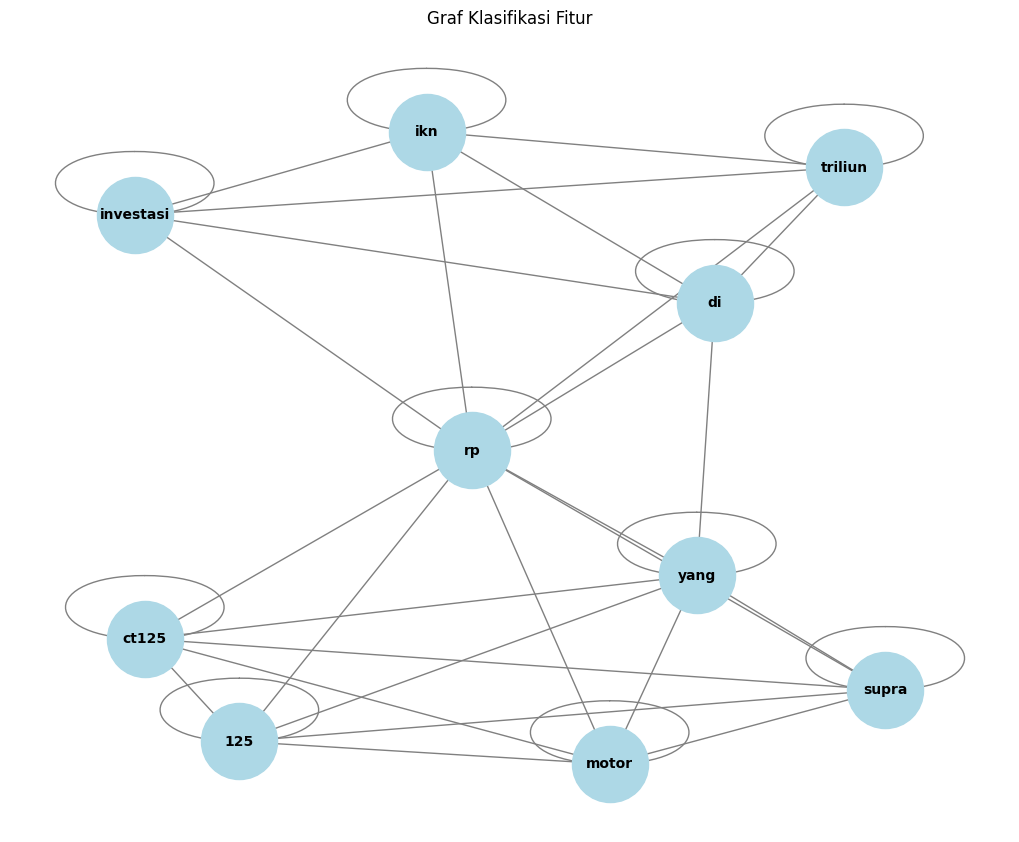

In [98]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()
